## Import Libaries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [172]:
data = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [173]:
# Display data head
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## view dataset columns

In [174]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## getting information on dataset

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check for missing values

In [176]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Let plot any missing or null values using heatmap by seaborn

<AxesSubplot:>

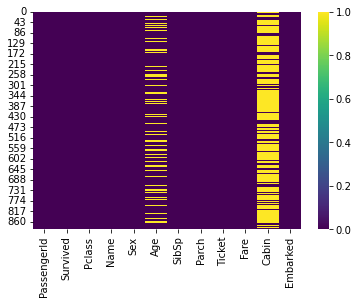

In [177]:
sns.heatmap(data.isnull(), cmap='viridis')

### so let replace the missing value using the mode() method

In [178]:
data = data.fillna(data.mode().iloc[0])
test = test.fillna(test.mode().iloc[0])

## Let check for null values again

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Let get an overview of our dataset by using the descibe function

In [180]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
data.shape

(891, 12)

In [182]:
data.size

10692

## Let see how way our variables relate to each other using corr() function

In [183]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036186,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,0.036186,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


<AxesSubplot:>

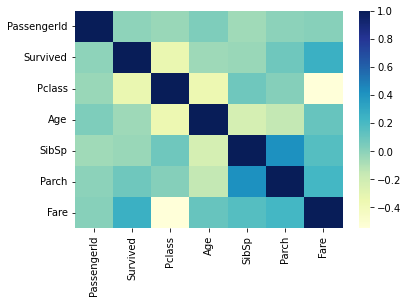

In [184]:
sns.heatmap(data.corr(),  cmap="YlGnBu")

### Let seperate the column into  numeric and categorical

In [185]:
data_num = data[['Age','SibSp','Parch','Fare']]
data_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

### Let plot a Histogram for the numeric variables

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

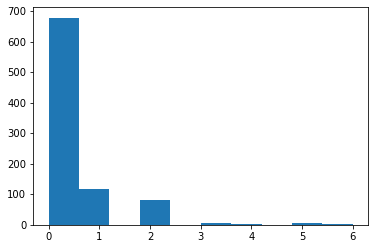

In [186]:
plt.hist(data_num['Parch'])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

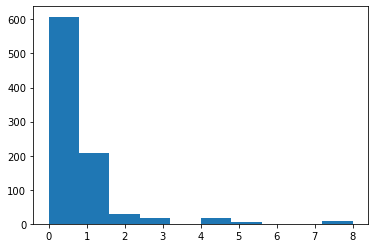

In [187]:
plt.hist(data_num['SibSp'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

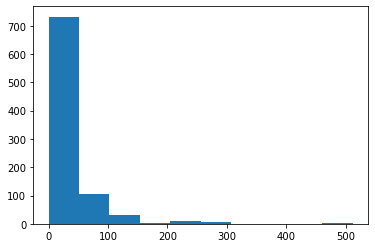

In [188]:
plt.hist(data_num['Fare'])

## Process the categorical data into numbers for our machine learning models

In [189]:
le = preprocessing.OneHotEncoder()
data['Sex'] = le.fit_transform(data[['Sex']]).toarray()
data['Cabin'] = le.fit_transform(data[['Cabin']]).toarray()
pd.get_dummies(data, columns=['Cabin'])
data['Cabin']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Cabin, Length: 891, dtype: float64

In [206]:
x = data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [207]:
y = data['Survived']

## Split the data

In [208]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [209]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [210]:
acc = model.score(x_test, y_test)
acc

0.7430167597765364

In [211]:
predicted = model.predict(x_test)
